In [1]:
import json
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta
 
# This creates two subdirectories called "theguardian" and "collection"
ARTICLES_DIR = join('theguardian', 'collection')
makedirs(ARTICLES_DIR, exist_ok=True)
 
# Sample URL
# http://content.guardianapis.com/search?from-date=2016-01-02&
# to-date=2016-01-02&order-by=newest&show-fields=all&page-size=200
# &api-key=your-api-key-goes-here
 
# Change this for your API key:
MY_API_KEY = 'f820d1dc-b679-45fb-aa15-443d1c44924f'
 
API_ENDPOINT = 'http://content.guardianapis.com/search'
my_params = {
    'from-date': "", # leave empty, change start_date / end_date variables instead
    'to-date': "",
    'order-by': "newest",
    'show-fields': 'all',
    'page-size': 200,
    'api-key': MY_API_KEY
}
 
# day iteration from here:
# http://stackoverflow.com/questions/7274267/print-all-day-dates-between-two-dates
 
# Update these dates to suit your own needs.
start_date = date(2019, 4, 1)
end_date = date(2019,10, 31)
 
dayrange = range((end_date - start_date).days + 1)
for daycount in dayrange:
    dt = start_date + timedelta(days=daycount)
    datestr = dt.strftime('%Y-%m-%d')
    fname = join(ARTICLES_DIR, datestr + '.json')
    if not exists(fname):
        # then let's download it
        print("Downloading", datestr)
        all_results = []
        my_params['from-date'] = datestr
        my_params['to-date'] = datestr
        current_page = 1
        total_pages = 1
        while current_page <= total_pages:
            print("...page", current_page)
            my_params['page'] = current_page
            resp = requests.get(API_ENDPOINT, my_params)
            data = resp.json()
            all_results.extend(data['response']['results'])
            # if there is more than one page
            current_page += 1
            total_pages = data['response']['pages']
 
        with open(fname, 'w') as f:
            print("Writing to", fname)
 
            # re-serialize it for pretty indentation
            f.write(json.dumps(all_results, indent=2))


...page 1
...page 2
Writing to theguardian/collection/2019-04-01.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-02.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-03.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-04.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-05.json
...page 1
Writing to theguardian/collection/2019-04-06.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-07.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-08.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-09.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-10.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-11.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-12.json
...page 1
Writing to theguardian/collection/2019-04-13.json
...page 1
...page 2
Writing to theguardian/collection/2019-04-14.json
...page 1
...page 2
Writing to theguardi

In [21]:
# Assignment 1. The collection
# Import TheGuardian OpenApi

import json
import os
from nltk.corpus import stopwords as sw

directory_name = "theguardian/collection/"

ids = list()
texts = list()
sections = list()
for filename in os.listdir(directory_name):
    if filename.endswith(".json"):
        with open(directory_name + filename) as json_file:
            data = json.load(json_file)
            for article in data:
                id = article['id']
                fields = article['fields']
                text = fields['bodyText'] if fields['bodyText'] else ""
                ids.append(id)
                texts.append(text)
                section = article['sectionId']	# Id name each article gets by The Guardian
                sections.append(section) # Adding each item to a list as above "sections = list()"

print("Number of ids: %d" % len(ids))
print("Number of texts: %d" % len(texts))


Number of ids: 46336
Number of texts: 46336


In [22]:
# Assignment 2. Pre-process and describe your collection
              
sect = set(sections) # Changing the list into a set, meaning that no duplicates of the section titles will appear. It thereby creates a list where each unique name appears only once.
# print(sect) # This could print the whole list of unique categories from the data set.
len(sect) # Counts the list of categories.

# Unique count of each of the ID names with the count of each category. Showing each how many articles there are under the ID name
import numpy as np
unique, counts = np.unique(sections, return_counts=True)
dict(zip(unique, counts)) 

# How many characters there are combined, through all the data.
all_lengths = list()
for text in texts:
    all_lengths.append(len(text))
print("Total sum of characters in dataset: %i" % sum(all_lengths))

# When performing a tokenization we can split up the strings and thereby count the total number of words. This method is without any tokenization tools.
word_count = 0
for text in texts:
    words = text.split()
    word_count = word_count + len(words)
word_count

# To get the unique words we do a word split but now also extend the words.
all_words = list()
for text in texts:
  words = text.split()
  all_words.extend(words)
unique_words = set(all_words)
unique_word_count = len(unique_words)
print("Unique word count: %i" % unique_word_count)

# The average word length is found by first finding all the individual word lengths, and then calculating the average from that.
total_word_length = 0
for word in all_words:
    total_word_length = total_word_length + len(word)
average_word_length = total_word_length / len(all_words)
print("Average word length: %.6f" % average_word_length)

# To find out how many sentences there are in total, we first select the end of sentence marker for where a sentence should finish.
def end_of_sentence_marker(character):
    if character in ['.', '?', '!']: # In our case we made '.', '?', '!' our sentence splitters. 
      return True
    else: 
      return False

def split_sentences(texts):
    sentences = []
    start = 0
    for end, character in enumerate(text): # The enumerate adds a counter to an iterable and returns it in a form of enumerate object, that then can be used in loops.
        if end_of_sentence_marker(character):
            sentence = text[start: end + 1]
            sentences.append(sentence)
            start = end + 1
    return sentences

all_sentences = list()
for text in texts:
  sentences = split_sentences(text)
  all_sentences.extend(sentences)
sentence_count = len(all_sentences)
sentence_count

# The average number of words in a sentence
words_per_sentence = word_count / sentence_count
print("words per sentence: %.6f" % words_per_sentence)

# The following code shows a random sample of the unique words. This is to give an idea of what the words looks like. Here we see that some words are not typical words e.g. numbers ‘£22.99’ or abbreviations like ‘JCRA’ or that the words have punctuation marks around them and therefore appear as a different word than the same word without them: look” vs. look
import random
random.sample(unique_words, 20)

Total sum of characters in dataset: 239486248
Unique word count: 834821
Average word length: 4.903535
words per sentence: 19.994102


['chldren.',
 'rich-voiced,',
 'KOSPI',
 '£123,000.',
 'Rose-Lynn,',
 'Test!”',
 '“spreading',
 'Aust',
 'SF1',
 'restitched',
 '‘Never,',
 'HMG,',
 'jot.',
 'Zimmer.',
 '“principals',
 'Akbar’',
 'glorified)',
 'well-considered,',
 'Motivated',
 '“available']

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# Word tokenization of the documents and converting of big letters to small ones. 
tokens = list()
for text in texts:
  tokens_in_text = word_tokenize(text)
  for token in tokens_in_text:
    if token.isalpha():
      tokens.append(token.lower())

In [27]:
# Creating a new list from the token list with stopwords removed
stopWords = set(sw.words('english'))
newstopwords = ['said', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'would', 'could', 'says', 'also']
stopWords.update(newstopwords)
swwords = list()
for w in tokens:
    if w not in stopWords:
        swwords.append(w)

print("Str.split word count: %i" % word_count) # Wordcount using str.split
print("Word count: %i" % len(tokens)) # Wordcount using nltk tokenizer
print("Word count with stopwords removed: %i" % len(swwords)) # Wordcount with stopwords removed using nltk tokenizer
unique_tokens = set(tokens)
unique_swwords = set(swwords)
print("Str.split unique word count: %i" % unique_word_count) # Unique wordcount using str.split
print("Unique word count: %i" % len(unique_tokens)) # Unique wordcount using nltk tokenizer
print("Unique word count with stopwords removed: %i" % len(unique_swwords)) # Unique wordcount with stopwords removed using nltk tokenizer


Str.split word count: 40574251
Word count: 39986300
Word count with stopwords removed: 20568321
Str.split unique word count: 834821
Unique word count: 199951
Unique word count with stopwords removed: 199783


In [28]:
import random
random.sample(unique_swwords, 20)

# Here we make a subset of the entire dataset. 2 lists are being made to include both the section id´s: “sport” & “football” and the indexes for the original list. 
idxes = []
subtexts = []
for i, section in enumerate(sections):
    if section in ['sport','football']:
        idxes.append(i)
        subtexts.append(texts[i])
len(idxes) # Test to see how many files there are under the sections “sport” & “football” respectively. These numbers can be compared to the list of all sections, where the total number of articles per section can be observed. 


7176

In [29]:
# Assignment 3. Select articles using a query
# To create the document-term matrix for the dataset we need to use CountVectorizer, 
# which can be imported with sklearn. To transform our data we must also use model_vect.fit_transform.
# When running to code, it tells us that there are 2.395.815 elements in our document matrix 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords as sw
model_vect = CountVectorizer(stop_words= stopWords, token_pattern=r'[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vect = model_vect.fit_transform(subtexts)
print('Shape: (%i, %i)' % data_vect.shape) # This shows how many documents 6808 x how many terms 87615 there are in our subset. We changed the initial dataset from only containing articles from starting on the 1st of September to ending on the 30th of October, to starting on the 1st of April to ending on the 30th of October. We did so because we wanted to show our results on a larger datascale.  
data_vect

# In this line of code we demonstrate how we're able to find the index placement of the 10 most used
# words in our documents. When using. A1 we're able to present results in an array, which
# can be described as a line of numbers. The [:10] tells that we want it as a top 10. We can change this
# number if we want to show more or fewer results eg. 20 or 5. 
counts = data_vect.sum(axis=0).A1
top_idxs = (-counts).argsort()[:10]
top_idxs

# Here we use inverted_vocabulary to assign the actual words belonging to the top-10 indexes in the sub-sets.
inverted_vocabulary = dict([(idx, word) for word, idx in model_vect.vocabulary_.items()])
top_words = [inverted_vocabulary[idx] for idx in top_idxs]
print("Top words in subset: %s" % top_words)

# Frequency/amount of times the words are being used in the entire dataset. So we can compare it to the most used word in the subsets.
from nltk.probability import FreqDist
fdist = FreqDist(swwords)
fdist.most_common(30)

# This line is not important in itself, but it creates a submatrix that will be used later on.
import random
some_row_idxs = random.sample(range(0,len(subtexts)), 10)
print("Selection: (%s x %s)" % (some_row_idxs, top_idxs))
sub_matrix = data_vect[some_row_idxs, :][:, top_idxs].todense()
sub_matrix

# The code here transforms the tf-idf model.
from sklearn.feature_extraction.text import TfidfTransformer
model_tfidf = TfidfTransformer()
data_tfidf = model_tfidf.fit_transform(data_vect)

# The freqs function helps us sort the top 10 words.
freqs = data_tfidf.mean(axis=0).A1
top_idxs = (-freqs).argsort()[:10].tolist()
top_words = [inverted_vocabulary[idx] for idx in top_idxs]
(top_idxs, top_words)

# Now we can use the submatrix and the transformed tf-idf, to create a scheme of the top 10 most used words and their weight in 10 random documents.
import pandas as pd
sub_matrix = data_tfidf[some_row_idxs, :][:,top_idxs].todense()
df = pd.DataFrame(columns=top_words, index=some_row_idxs, data=sub_matrix)
df

# Query terms that we think we will find in our subsets. 
terms = ['tottenham', 'hotspurs', 'hotspur', 'spurs', 'stadium', 'new', 'home']
terms

# The count of each term in the subsets, how many times it is used. 
term_idxs = [model_vect.vocabulary_.get(term) for term in terms]
term_counts = [counts[idx] for idx in term_idxs]
term_counts

# Calculate the term weights 
idfs = model_tfidf.idf_
term_idfs = [idfs[idx] for idx in term_idxs]
term_idfs

# Creates a matrix for the query words and their weight in the chosen subsets
dfi = pd.DataFrame(columns=['count', 'idf'], index=terms, data=zip(term_counts,term_idfs))
dfi


Shape: (7176, 89252)
Top words in subset: ['first', 'game', 'back', 'last', 'time', 'england', 'ball', 'team', 'world', 'min']
Selection: ([2071, 6523, 3085, 3595, 6914, 4080, 68, 4370, 4744, 2194] x [27586 30285  5549 43358 79885 24306  6000 78230 87956 49742])


,count,idf
tottenham,1804,3.122868
hotspurs,1,9.185490
hotspur,263,4.713851
spurs,2276,3.431331
stadium,2489,2.663397
new,8495,1.757454
home,6112,1.899983


In [30]:
# Assignment 4. Model and visualize the topics in your subset
# 4 components
from sklearn.decomposition import LatentDirichletAllocation
model_lda = LatentDirichletAllocation(n_components=6, random_state=0)
data_lda = model_lda.fit_transform(data_vect)
np.shape(data_lda)

# Here we show the top 20 words and their individual weight related to each of the 4 components   
for i, term_weights in enumerate(model_lda.components_):
    top_idxs = (-term_weights).argsort()[:20]
    top_words = ["%s (%.3f)" % (model_vect.get_feature_names()[idx], term_weights[idx]) for idx in top_idxs]
    print("Topic %d: %s" % (i, ", ".join(top_words)))
    
# A small matrix to illustrate which document is the most likely to match one of the topics that was found in the code above.  
topic_names = ["Topic" + str(i) for i in range(model_lda.n_components)]
doc_names = ["Doc" + str(i) for i in range(len(subtexts))]
df = pd.DataFrame(data=np.round(data_lda, 2), columns=topic_names, index=doc_names).head(10)
df.style.applymap(lambda val: "background: red" if val>.3 else '', )


Topic 0: first (4420.436), set (3961.235), game (3510.641), second (2736.723), match (2358.245), back (2050.653), win (1938.276), court (1844.487), time (1828.172), points (1722.362), point (1676.815), last (1647.057), break (1635.125), final (1579.765), nadal (1490.166), play (1481.114), year (1444.259), serve (1438.082), federer (1412.082), third (1396.293)
Topic 1: race (2564.650), team (1907.517), time (1589.802), first (1576.523), hamilton (1483.117), year (1462.361), lap (1257.765), tour (1184.551), racing (1135.465), back (1128.294), world (1095.992), last (1023.063), stage (995.074), sport (946.548), vettel (937.167), win (915.713), second (880.171), still (878.287), leclerc (846.167), front (838.087)
Topic 2: min (12521.214), ball (8761.183), back (5754.799), right (4550.672), goal (4318.023), left (4001.479), shot (3885.432), first (3590.408), mins (3417.554), game (3293.557), corner (3141.506), second (3052.683), get (2902.939), half (2785.561), time (2775.706), well (2507.1

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5
Doc0,0.17,0.17,0.17,0.17,0.17,0.17
Doc1,0,0,0,0.57,0,0.43
Doc2,0,0,0.21,0,0,0.79
Doc3,0,0.01,0,0,0,0.99
Doc4,0.07,0.23,0,0,0,0.7
Doc5,0.03,0.01,0,0,0.8,0.16
Doc6,0,0.38,0,0.62,0,0
Doc7,0.44,0.33,0,0,0.03,0.2
Doc8,0,0,0,0,0.77,0.23
Doc9,0,0.21,0.11,0,0,0.68


Doc idx: 2547
Topic vector: [4.79234350e-04 8.51010503e-01 4.79129531e-04 4.79065153e-04
 4.80836990e-04 1.47071231e-01]
Topic vote: 1


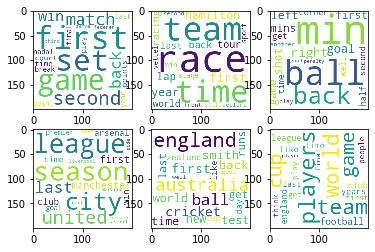

In [31]:
# In this code we’re able to take a random document and show its index placement, topic vector, which of the 4 components it relates the most to. Lastly we’re shown the entire document text  
doc_idx = random.randint(0,len(subtexts)-1)
print('Doc idx: %d' % doc_idx)
topics = data_lda[doc_idx]
print('Topic vector: %s' % topics)
vote = np.argsort(-topics)[0]
print('Topic vote: %i' % vote)
subtexts[doc_idx]

# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, term_weights in enumerate(model_lda.components_):
    top_idxs = (-term_weights).argsort()[:20]
    top_words = [model_vect.get_feature_names()[idx] for idx in top_idxs]
    word_freqs = dict(zip(top_words, term_weights[top_idxs]))
    wc = WordCloud(background_color="white",width=200,height=200, max_words=20).generate_from_frequencies(word_freqs)
    plt.subplot(2, 3, i+1)
    plt.imshow(wc)


In [0]:
# The following code compares each of the topics from earlier to ALL texts in our subset and shows which document is most connected to each topic. 
df = pd.DataFrame(data=data_lda, columns=topic_names)
df['class'] = idxes
df = df.groupby('class').mean().round(2)
df.style.applymap(lambda val: "background: red" if val>.5 else '', )

# These lines make unique words from our subsets, where stopwords, small letters, and tokenizer are used. This has been done to get plot frequency distribution and Zipf’s law graph. 
subtokens = list()
for subtext in subtexts:
  tokens_in_subtext = word_tokenize(subtext)
  for subtoken in tokens_in_subtext:
    if subtoken.isalpha():
      subtokens.append(subtoken.lower())
stopWords = set(sw.words('english'))
subwords = list()
for w in subtokens:
    if w not in stopWords:
        subwords.append(w)


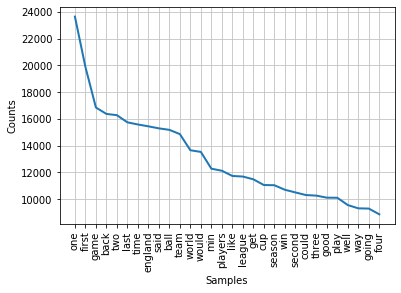

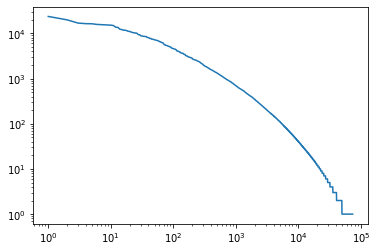

In [33]:
# Plot frequency distribution
from nltk.probability import FreqDist
fdist = FreqDist(subwords)
fdist.most_common(30)
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# Zipf’s law
ranks = range(1, len(fdist) + 1)
freqs = list(fdist.values())
freqs.sort(reverse = True)
plt.plot(ranks, freqs, '-')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [35]:
# Here we try to answer our research question: With which topics was the football club Tottenham mentioned? 
# We have the previously selected and used terms from assignment 3. First, we combine the 7 query words.
query = " ".join(terms)
query

# Then changing the query in to a sparse matrix with 1 row. 
query_vect_counts = model_vect.transform([query])
query_vect = model_tfidf.transform(query_vect_counts)
query_vect

# We then compare all terms with our research question, where the percentage shows how well they fit with our query.
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(query_vect, data_tfidf)
sims

# Here we sort the documents by how well they fit our query. The most likely is at the top.
sims_sorted_idx = (-sims).argsort()
sims_sorted_idx

# The document that fits our query best is shown here and you get the whole article. The article is: https://www.theguardian.com/football/blog/2019/apr/03/tottenham-new-stadium-spurs-numbers-game-crystal-palace which is about the new stadium that Tottenham hotspurs got in March. 
subtexts[sims_sorted_idx[0,0]]
 
# Second query using only “tottenham” and “spurs” to find articles only related to these terms.
TotSputerms = ['tottenham', 'spurs']

# In these lines we make a vectorizer model of how many times tottenham and spurs are mentioned (frequency), and what their idf is. The two numbers together lets us calculate the weight of the terms.   
totterm_idxs = [model_vect.vocabulary_.get(term) for term in TotSputerms]
totterm_counts = [counts[idx] for idx in totterm_idxs]
Totidfs = model_tfidf.idf_
Totterm_idfs = [Totidfs[idx] for idx in totterm_idxs]
totdf = pd.DataFrame(columns=['count', 'idf'], index=TotSputerms, data=zip(totterm_counts,Totterm_idfs))
totdf

,count,idf
tottenham,1804,3.122868
spurs,2276,3.431331


In [36]:

# We join the terms tottenham and spurs into a string, then we transform them into a model vectorizer. We compare the similarity between the query and each document.
tsquery = " ".join(TotSputerms)
tsquery_vect_counts = model_vect.transform([tsquery])
tsquery_vect = model_tfidf.transform(tsquery_vect_counts)
from sklearn.metrics.pairwise import cosine_similarity
tssims = cosine_similarity(tsquery_vect, data_tfidf)
tssims_sorted_idx = (-tssims).argsort()
 
# In this section we show the top 5 most related articles to our query. 
print("First article most fitting query: (%s)" % (subtexts[tssims_sorted_idx[0,0]]))
print("Second article most fitting query: (%s)" % (subtexts[tssims_sorted_idx[0,1]]))
print("Third article most fitting query: (%s)" % (subtexts[tssims_sorted_idx[0,2]]))
print("Fourth article most fitting query: (%s)" % (subtexts[tssims_sorted_idx[0,3]]))
print("Fifth article most fitting query: (%s)" % (subtexts[tssims_sorted_idx[0,4]]))
 
# Mini matrix showing cosine similarity between articles and the research question. This shows which article is the most likely to have the words from our query to answer the research question.
print("Shape of 2-D array similarity from query: (%i, %i)" % (len(tssims), len(tssims[0,:])) )
tsdf = pd.DataFrame(data=zip(tssims_sorted_idx[0,:], tssims[0,tssims_sorted_idx[0,:]]), columns=["Article Id", "Similarity in %"])
tsdf[0:10]


First article most fitting query: (Tanguy Ndombele has signed a six-year contract at Tottenham after passing a medical. The club have shattered their transfer record to buy the midfielder from Lyon for €62m (£55.45m) plus €10m in add-ons – eclipsing the £42m paid to Ajax for Davinson Sánchez in 2017. The 22-year-old was Mauricio Pochettino’s No 1 target and Spurs were able to see off late interest from Manchester United. Pochettino has convinced six-times capped France international that the next step of his career would be best served at Tottenham and Ndombele was impressed when shown around the training ground. Jean-Michel Aulas, the Lyon chairman, has maintained that Ndombele is worth €75m and he is line to virtually get his price. What Spurs will get is a player to quicken the pulse, a central midfielder to replace Mousa Dembélé, mixing skill and electric dribbling with raw power. Roma are considering a move for the Spurs centre-half Toby Alderweireld, and the idea has been floated

,Article Id,Similarity in %
0,1866,0.374958
1,3423,0.334321
2,6266,0.330676
3,5891,0.323232
4,6672,0.321532
5,404,0.314557
6,6221,0.313552
7,3262,0.298188
8,3869,0.288612
9,1126,0.282419
